# 04. 다양한 분류 알고리즘

# 04-01. 로지스틱 회귀

## 럭키백 안에 랜덤으로 담기게 될 생선 7마리에 대한 확률 구하기
- K-최근접 이웃 분류기를 사용
 - 주변 이웃 클래스의 비율을 확률로 표시

In [3]:
# 데이터 준비

import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()  # 데이터프레임의 시작 부분을 출력하는 함수(default=5)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
print(pd.unique(fish['Species']))  # Species 열의 고유한 값 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
# Species를 타깃으로, 나머지 열을 입력 데이터로 사용
# 원하는 열만 선택하고 넘파이 배열로 변환

fish_target = fish[['Species']].to_numpy()
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_target[:5])
print(fish_input[:5])

[['Bream']
 ['Bream']
 ['Bream']
 ['Bream']
 ['Bream']]
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [14]:
# 데이터를 훈련 세트와 테스트 세트로 분할, 표준화 전처리

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [15]:
# 모델의 점수 확인

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


---
DataConversionWarning이 발생한 이유: fit의 타깃에 2차원 배열이 입력됨   
해결방안
- ravel()
- reshape()
- flatten()


In [10]:
import numpy as np

test = np.array(
    [[1, 2],
     [3, 4]]
    )

a1 = test.ravel()
a2 = test.reshape(-1)
a3 = test.flatten()
print(a1, a2, a3)

[1 2 3 4] [1 2 3 4] [1 2 3 4]


In [11]:
# 이 중 flatten()만 값을 복사(원본 값이 변경되어도 결과가 달라지지 않음)

test[0][1] = 5
print(a1, a2, a3)

[1 5 3 4] [1 5 3 4] [1 2 3 4]


---

In [16]:
# 타깃값을 1차원 배열로 변환 후 진행

train_target, test_target = train_target.flatten(), test_target.flatten()

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 다중 분류(multiclass classification)
- 타깃 데이터에 2개 이상의 클래스가 포함된 경우 다중 분류
- 사이킷런에서는 타깃 데이터에 문자열을 그대로 사용 가능(단, 타깃값은 알파벳 순서로 정렬)
- 훈련 방식에 있어 이진 분류와 차이는 없음

In [17]:
# 알파벳 순서로 정렬된 타깃값
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
# 테스트 세트의 첫 5개 샘플에 대한 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [19]:
# predict()는 predict_proba()의 반환값을 토대로 정해짐
# predict_proba(): 클래스별 확률값 반환

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))  # 소수점 다섯째 자리에서 반올림 후 넷째 자리까지 표기(default = 1)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


행: 샘플   
열: 샘플에 대한 각 클래스의 확률   

ex. 네 번째 샘플이 3번째 클래스인 Perch일 확률은 0.6667

In [20]:
# 모델이 계산한 확률과 실제 이웃의 비율 비교

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


문제점: 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3로 한정됨

## 로지스틱 회귀(logistic regression)
- 선형 회귀와 동일하게 선형 방정식을 사용
- 시그모이드 함수(sigmoid function)(= 로지스틱 함수): z가 매우 큰 음수일 때 0, 매우 큰 양수일 때 1이 되도록 변환하는 함수
- 시그모이드 함수를 사용하면 0 ~ 1까지의 값을 0% ~ 100%로 변환하여 표현할 수 있다.
- 계산식
$$S(x)=\frac{1}{1+e^{-z}}$$

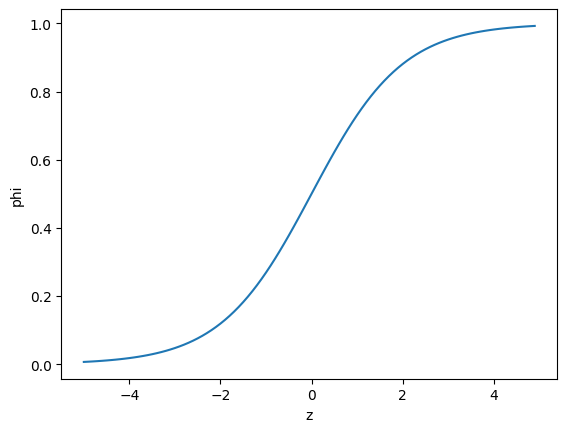

In [22]:
# 시그모이드 함수 계산

import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)  # -5에서 5까지 0.1 간격으로 배열 생성
phi = 1/ (1 + np.exp(-z))  #exp(): 지수 계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행
- 도미와 빙어의 데이터만 이용
- 0.5보다 작다면 음성 클래스, 크다면 양성 클래스로 판단

- 불리언 인덱싱(boolean indexing): 넘파이 배열에 True, False값을 전달해 특정 행을 선택하는 방법

In [23]:
# 불리언 인덱싱의 예시

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [24]:
# 훈련 세트에서 도미와 빙어에 해당하는 행만 선택해 데이터 생성

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 비트 OR 연산자를 사용해 각각의 비교 결과 통합
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [27]:
# 데이터를 이용해 모델 훈련

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 처음 5개의 샘플에 대한 예측과 예측확률
# 첫 번째 열이 음성 클래스(0), 두 번째 열이 양성 클래스(1)에 대한 확률이 됨

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [28]:
# 알파벳 순서로 정렬되었기 때문에 빙어가 음성 클래스(0)
print(lr.classes_)

['Bream' 'Smelt']


In [29]:
# 로지스틱 회귀가 학습한 계수
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [30]:
# decision_function()으로 z값(함수를 계산한 결과값) 출력

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [31]:
# 사이파이 라이브러리의 expit()(시그모이드 함수)를 이용해 확률로 변환

from scipy.special import expit

print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


결과값이 predict의 두 번째 열괃 동일    
→ decision_function()은 양성 클래스에 대한 z값을 반환한다.

### 로지스틱 회귀로 다중 분류 수행

#### LogisticRegression 클래스의 특징
- 릿지 회귀와 같이 제곱을 규제
 - 매개변수 C가 작을수록 규제가 커짐
 - default = 1
- 반복 알고리즘을 사용하며 정해진 반복 횟수를 초과하면 경고 발생
 - default = 100
- solver 매개변수에서 사용할 알고리즘 선택 가능
 - default = 'lbfgs'
 - sag: 확률적 평균 경사 하강법 알고리즘
 - saga: sag의 개선 버전
- penalty 매개변수에서 규제 방식 선택 가능
 - l1: 릿지 규제
 - l2: 라쏘 규제(기본값)

In [33]:
# 모델 훈련 후 평가

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [35]:
# 처음 5개의 샘플에 대한 예측과 확률 출력

print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


7종류의 생선에 대한 확률을 계산했기 때문에 7개의 열 출력

In [36]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [37]:
# 다중 분류 선형 방정식의 형태
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


각각의 클래스마다 z값을 하나씩 계산(coef_와 intercept_의 행이 7개   
5개의 특성을 사용하기 때문에 coef_의 열은 5개   
→ 가장 높은 z값을 출력하는 클래스가 예측 클래스가 됨

#### 소프트맥스 함수(softmax function)
- 여러 개의 선형 방정식 값을 0 ~ 1로 압축하고 전체 합이 1이 되도록 하는 함수
- 지수 함수를 사용하기 때문에 정규화된 지수 함수라고도 함
- 계산식
 - z값을 사용해 지수 함수를 계산하고 더한 값 e_sum의 계산식
$$e\_sum = e^{z1} + e^{z2} + e^{z3}...+e^{zn}$$
 - 각 지수 함수를 e_sum으로 더하면 결과값 도출(모든 결과값을 더하면 1이 됨)
$$s1=\frac{e^{z1}}{e\_sum}, s2=\frac{e^{z2}}{e\_sum}..., sn=\frac{e^{zn}}{e\_sum}$$

In [38]:
# 소프트맥스 함수를 이용해 확률 계산
#처음 5개의 샘플에 대한 각 클래스의 z값 추출

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [40]:
# 사이파이의 softmax() 이용

from scipy.special import softmax

proba = softmax(decision, axis=1)  # axis=1로 설정하여 각 행에 대한 소프트맥스 계산(지정하지 않을 경우 배열 전체에 대해 계산함)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 구한 proba배열과 일치